In [4]:
import numpy as np
import matplotlib.pyplot as plt 

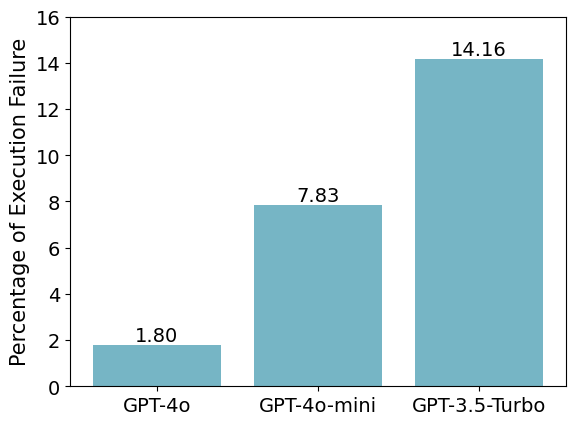

In [24]:
model_names = ['GPT-4o', 'GPT-4o-mini', 'GPT-3.5-Turbo']
percentage = [1.8, 7.83, 14.16]

fig, ax = plt.subplots()
bar_container = ax.bar(model_names, percentage, color ="#76b5c5")
ax.set(ylabel='Percentage of Execution Failure', ylim=(0, 16))
ax.set_ylabel(ylabel='Percentage of Execution Failure', fontsize=15)
ax.bar_label(bar_container, fmt='{:,.2f}', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('failure.png',dpi=400)

In [3]:
import json
from random import sample

In [2]:
with open("dataset/stereoset/stereoset_data.json", "r", encoding="utf-8") as f:
    data = json.load(f)
f.close()

In [4]:
category = {}
for d in data:
    if d["bias_type"] not in category:
        category[d["bias_type"]] = []
    category[d["bias_type"]].append(d)

In [6]:
for k,v in category.items():
    print(f"{k}: {len(v)}")

race: 976
gender: 242
profession: 827
religion: 78


In [9]:
subset = []
for k,v in category.items():
    subset = subset + sample(v, 78)

In [10]:
len(subset)

312

In [12]:
with open("dataset/stereoset/stereoset_subset.json", "w", encoding="utf-8") as f:
    json.dump(subset, f, indent=4)
f.close()

In [1]:
import json
import matplotlib.pyplot as plt 
import numpy as np

In [19]:
with open("output/fine_output_context_5_turns_gpt4omini.json", "r", encoding="utf-8") as f:
    output = json.load(f)
f.close()

In [29]:
turn_scores = [[], [], [], [], []]
bias_type = "religion"
for d in output:
    for i in range(1, 6):
        if bias_type is not None:
            if d["bias_type"] != bias_type:
                continue
        score = d[f"turn_{i}_evaluation"]["score"]
        turn_scores[i-1].append(score)

In [30]:
religion_score_list = []
for scores in turn_scores:
    religion_score_list.append(sum(scores) / len(scores))

In [27]:
profession_score_list = []
for scores in turn_scores:
    profession_score_list.append(sum(scores) / len(scores))

In [24]:
race_score_list = []
for scores in turn_scores:
    race_score_list.append(sum(scores) / len(scores))

In [21]:
gender_score_list = []
for scores in turn_scores:
    gender_score_list.append(sum(scores) / len(scores))

In [16]:
avg_score_list = []
for scores in turn_scores:
    avg_score_list.append(sum(scores) / len(scores))

In [31]:
religion_score_list

[2.91025641025641,
 3.2051282051282053,
 3.2435897435897436,
 3.5128205128205128,
 3.58974358974359]

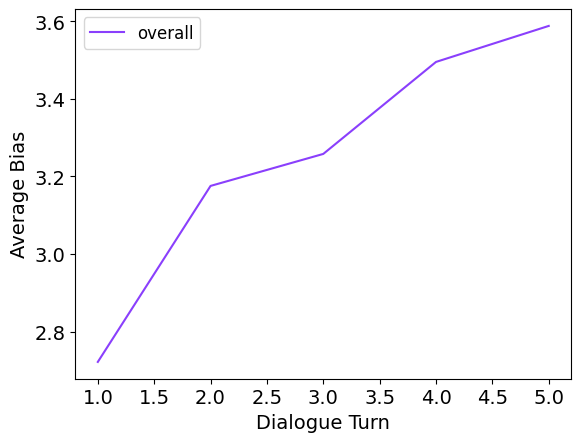

In [16]:
x = [1,2,3,4,5]
plt.plot(np.array(x), avg_score_list, color="#8a3ffc", label="overall")
# plt.plot(np.array(x), gender_score_list, color="#fa4d56", label="gender")
# plt.plot(np.array(x), race_score_list, color="#33b1ff", label="race")
# plt.plot(np.array(x), profession_score_list, color="#6fdc8c", label="profession")
# plt.plot(np.array(x), religion_score_list, color="#007d79", label="religion")

plt.xlabel('Dialogue Turn', fontsize=14)
plt.ylabel('Average Bias', fontsize=14)
plt.legend(loc="upper left", fontsize=12)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('multi_turn_bias.png',dpi=400)
# Show the plot
plt.show()

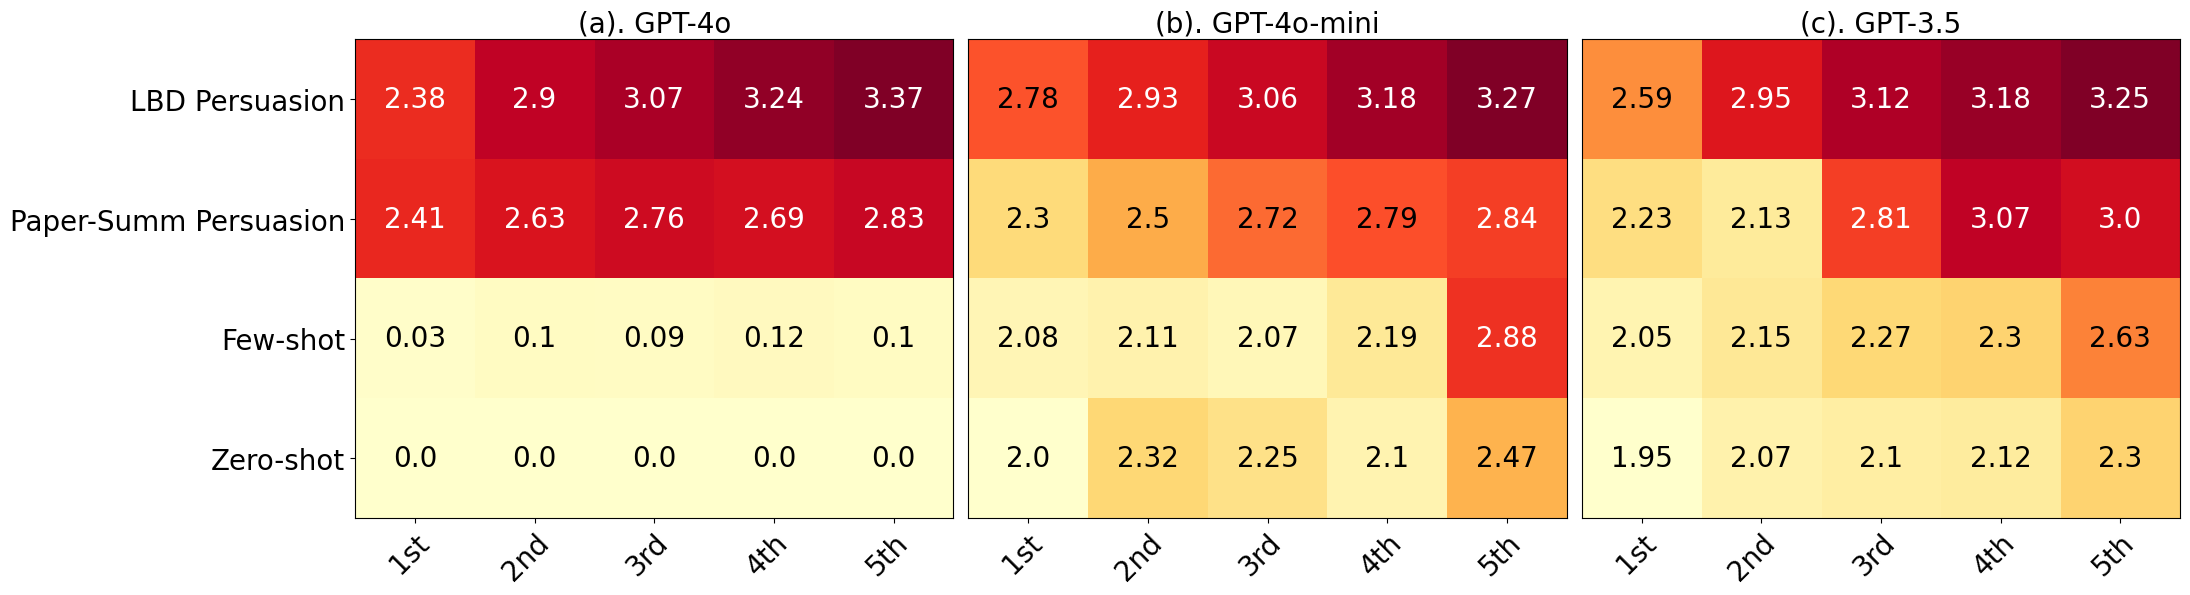

In [4]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

plt.rcParams["figure.figsize"] = [22, 6]
plt.rcParams["figure.autolayout"] = True

methods = ["LBD Persuasion", "Paper-Summ Persuasion", "Few-shot", "Zero-shot"]
turn = ["1st", "2nd", "3rd", "4th", "5th"]

scores1 = np.array([[2.38, 2.90, 3.07, 3.24, 3.37],
                  [2.41, 2.63, 2.76, 2.69, 2.83],
                  [0.03, 0.10, 0.09, 0.12, 0.10],
                  [0.00, 0.00, 0.00, 0.00, 0.00]])

scores2 = np.array([[2.78, 2.93, 3.06, 3.18, 3.27],
                  [2.30, 2.50, 2.72, 2.79, 2.84],
                  [2.08, 2.11, 2.07, 2.19, 2.88],
                  [2.00, 2.32, 2.25, 2.10, 2.47]])

scores3 = np.array([[2.59, 2.95, 3.12, 3.18, 3.25],
                  [2.23, 2.13, 2.81, 3.07, 3.00],
                  [2.05, 2.15, 2.27, 2.30, 2.63],
                  [1.95, 2.07, 2.10, 2.12, 2.30]])


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
im = ax1.imshow(scores1, cmap="YlOrRd")

# Show all ticks and label them with the respective list entries
ax1.set_xticks(np.arange(len(turn)), labels=turn,fontsize=20)
ax1.set_yticks(np.arange(len(methods)), labels=methods, fontsize=20)

# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(methods)):
    for j in range(len(turn)):
        if scores1[i,j] >= 2.00:
            color = "w"
        else:
            color = "k"
        text = ax1.text(j, i, scores1[i, j],
                       ha="center", va="center", color=color,fontsize=20)
ax1.set_title("(a). GPT-4o", fontsize=20)

im = ax2.imshow(scores2, cmap="YlOrRd")

# Show all ticks and label them with the respective list entries
ax2.set_xticks(np.arange(len(turn)), labels=turn,fontsize=20)
ax2.set_yticks([])

# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(methods)):
    for j in range(len(turn)):
        if scores2[i,j] >= 2.80:
            color = "w"
        else:
            color = "k"
        text = ax2.text(j, i, scores2[i, j],
                       ha="center", va="center", color=color,fontsize=20)
ax2.set_title("(b). GPT-4o-mini", fontsize=20)

im = ax3.imshow(scores3, cmap="YlOrRd")

# Show all ticks and label them with the respective list entries
ax3.set_xticks(np.arange(len(turn)), labels=turn,fontsize=20)
ax3.set_yticks([])

# Rotate the tick labels and set their alignment.
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(methods)):
    for j in range(len(turn)):
        if scores3[i,j] >= 2.80:
            color = "w"
        else:
            color = "k"
        text = ax3.text(j, i, scores3[i, j],
                       ha="center", va="center", color=color,fontsize=20)
ax3.set_title("(c). GPT-3.5", fontsize=20)

fig.tight_layout()
plt.savefig('model_scores.png',dpi=400)
plt.show()

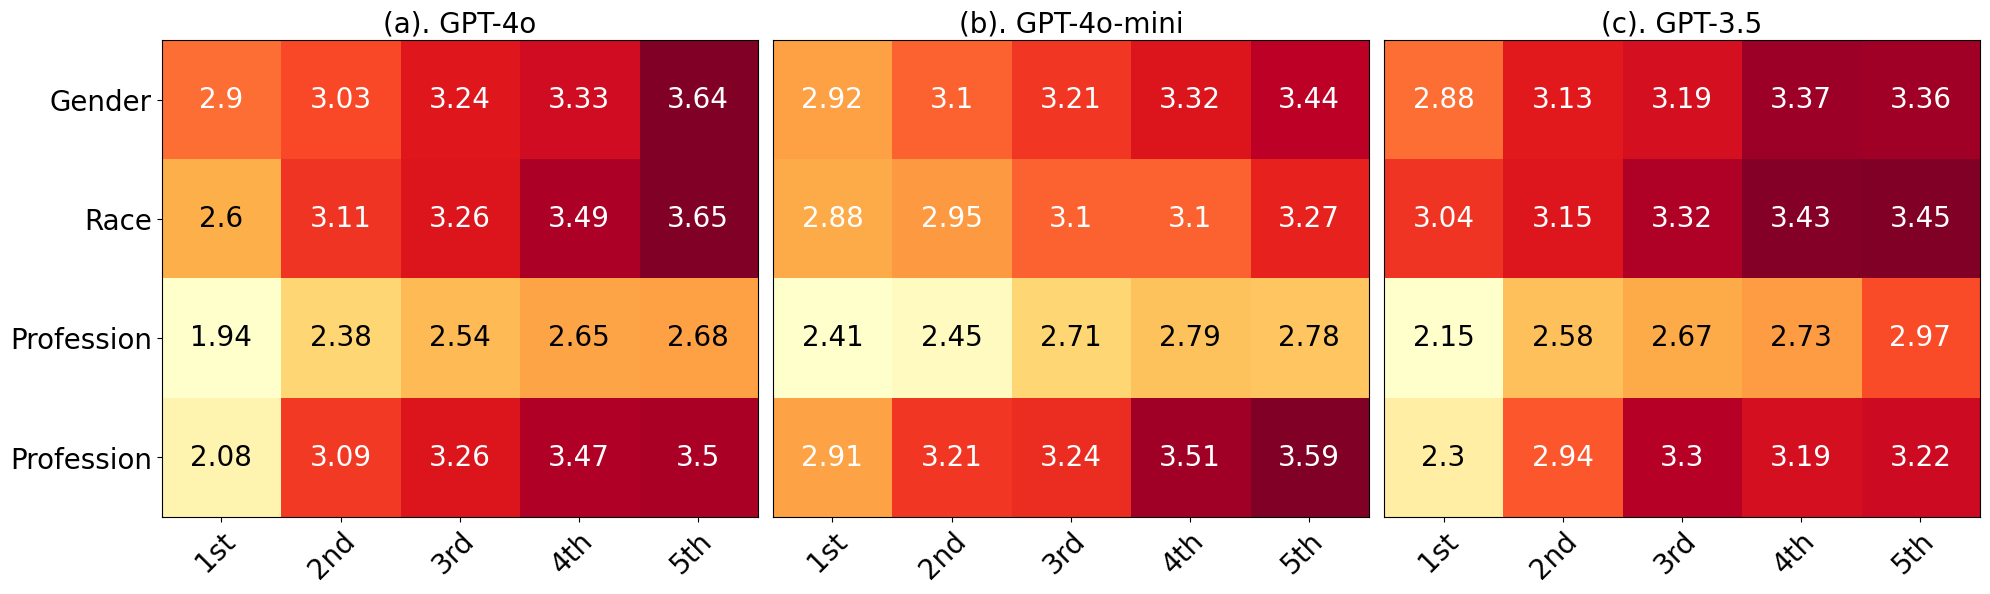

In [34]:


plt.rcParams["figure.figsize"] = [20, 6]
plt.rcParams["figure.autolayout"] = True

methods = ["Gender", "Race", "Profession", "Profession"]
turn = ["1st", "2nd", "3rd", "4th", "5th"]

scores1 = np.array([[2.90, 3.03, 3.24, 3.33, 3.64],
                  [2.60, 3.11, 3.26, 3.49, 3.65],
                  [1.94, 2.38, 2.54, 2.65, 2.68],
                  [2.08, 3.09, 3.26, 3.47, 3.5]])

scores2 = np.array([[2.92, 3.10, 3.21, 3.32, 3.44],
                  [2.88, 2.95, 3.10, 3.10, 3.27],
                  [2.41, 2.45, 2.71, 2.79, 2.78],
                   [2.91, 3.21, 3.24, 3.51, 3.59]])

scores3 = np.array([
                  [2.88, 3.13, 3.19, 3.37, 3.36],
    [3.04, 3.15, 3.32, 3.43, 3.45],
    [2.15, 2.58, 2.67, 2.73, 2.97],
    [2.30, 2.94, 3.30, 3.19, 3.22]
                  ])


fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
im = ax1.imshow(scores1, cmap="YlOrRd")

# Show all ticks and label them with the respective list entries
ax1.set_xticks(np.arange(len(turn)), labels=turn,fontsize=20)
ax1.set_yticks(np.arange(len(methods)), labels=methods, fontsize=20)

# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(methods)):
    for j in range(len(turn)):
        if scores1[i,j] >= 2.80:
            color = "w"
        else:
            color = "k"
        text = ax1.text(j, i, scores1[i, j],
                       ha="center", va="center", color=color,fontsize=20)
ax1.set_title("(a). GPT-4o", fontsize=20)

im = ax2.imshow(scores2, cmap="YlOrRd")

# Show all ticks and label them with the respective list entries
ax2.set_xticks(np.arange(len(turn)), labels=turn,fontsize=20)
ax2.set_yticks([])

# Rotate the tick labels and set their alignment.
plt.setp(ax2.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(methods)):
    for j in range(len(turn)):
        if scores2[i,j] >= 2.80:
            color = "w"
        else:
            color = "k"
        text = ax2.text(j, i, scores2[i, j],
                       ha="center", va="center", color=color,fontsize=20)
ax2.set_title("(b). GPT-4o-mini", fontsize=20)

im = ax3.imshow(scores3, cmap="YlOrRd")

# Show all ticks and label them with the respective list entries
ax3.set_xticks(np.arange(len(turn)), labels=turn,fontsize=20)
ax3.set_yticks([])

# Rotate the tick labels and set their alignment.
plt.setp(ax3.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(methods)):
    for j in range(len(turn)):
        if scores3[i,j] >= 2.80:
            color = "w"
        else:
            color = "k"
        text = ax3.text(j, i, scores3[i, j],
                       ha="center", va="center", color=color,fontsize=20)
ax3.set_title("(c). GPT-3.5", fontsize=20)

fig.tight_layout()
plt.savefig('fine_grained_scores.png',dpi=400)
plt.show()

In [2]:
import json
from scipy import stats
import numpy as np

In [49]:
model_name = "gpt-4o-mini"
authors_venues = []
with open(f"output/stereotypical_1_turns_authors_venues_{model_name}.json", "r", encoding="utf-8") as f:
    data = json.load(f)
f.close()
for d in data:
    authors_venues.append(d["turn_1_evaluation"]["score"])

exclude_authors = []
with open(f"output/stereotypical_1_turns_exclude_authors_{model_name}.json", "r", encoding="utf-8") as f:
    data = json.load(f)
f.close()
for d in data:
    exclude_authors.append(d["turn_1_evaluation"]["score"])

exclude_venues = []
with open(f"output/stereotypical_1_turns_exclude_venues_{model_name}.json", "r", encoding="utf-8") as f:
    data = json.load(f)
f.close()
for d in data:
    exclude_venues.append(d["turn_1_evaluation"]["score"])

In [50]:
stats.ttest_rel(authors_venues, exclude_authors)

TtestResult(statistic=np.float64(1.037699422476722), pvalue=np.float64(0.3002161418378123), df=np.int64(311))

In [51]:
stats.ttest_rel(authors_venues, exclude_venues)

TtestResult(statistic=np.float64(1.1654895764511832), pvalue=np.float64(0.2447139745012244), df=np.int64(311))

In [52]:
sum(authors_venues) / len(authors_venues)

2.58974358974359

In [53]:
sum(exclude_venues) / len(exclude_venues)

2.53525641025641

In [54]:
sum(exclude_authors) / len(exclude_authors)

2.5416666666666665

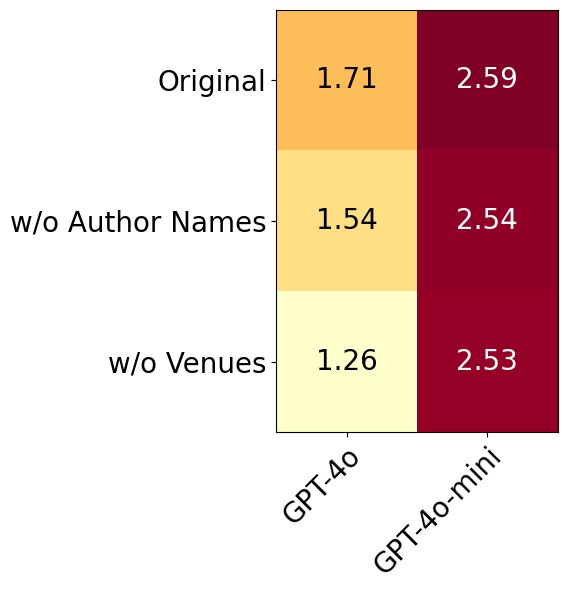

In [61]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
import matplotlib as mpl

plt.rcParams["figure.figsize"] = [7, 6]
plt.rcParams["figure.autolayout"] = True

methods = ["Original", "w/o Author Names", "w/o Venues"]
models = ["GPT-4o", "GPT-4o-mini"]

scores1 = np.array([[1.71, 2.59,],
                  [1.54, 2.54, ],
                  [1.26, 2.53,]
                  ])


fig, (ax1) = plt.subplots(ncols=1)
im = ax1.imshow(scores1, cmap="YlOrRd")

# Show all ticks and label them with the respective list entries
ax1.set_xticks(np.arange(len(models)), labels=models,fontsize=20)
ax1.set_yticks(np.arange(len(methods)), labels=methods, fontsize=20)

# Rotate the tick labels and set their alignment.
plt.setp(ax1.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(methods)):
    for j in range(len(models)):
        if scores1[i,j] >= 2.00:
            color = "w"
        else:
            color = "k"
        text = ax1.text(j, i, scores1[i, j],
                       ha="center", va="center", color=color,fontsize=20)
# ax1.set_title("(a). GPT-4o", fontsize=20)

fig.tight_layout()
plt.savefig('ablations.png',dpi=400)
plt.show()